In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


df = pd.read_csv (r"C:Users/home/shalom/Desktop/MDE/mde/data/Bicycle_Counter.csv" ,parse_dates=True, index_col ='Date')
df=df['2012-10-01':'2014-06-01']
df=df.resample('w').sum()

#display weekly data from 2012 to 2014 
print(df.head(20))



FileNotFoundError: ignored

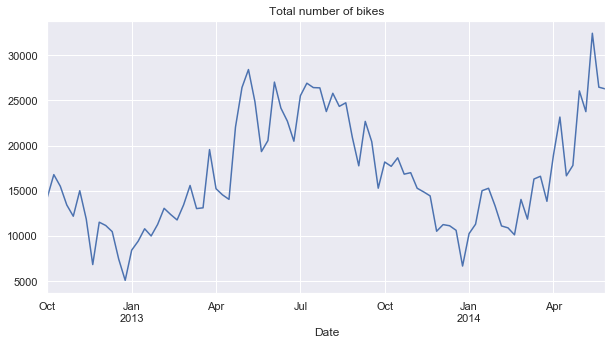

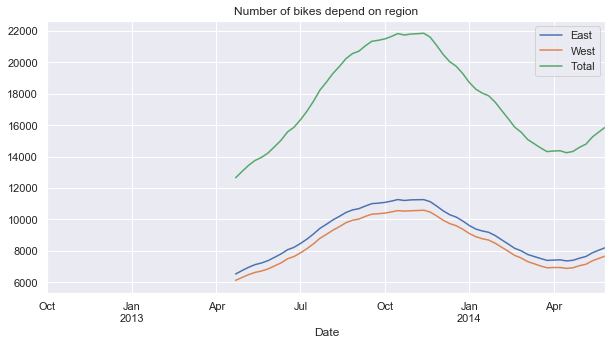

In [ ]:

plt.figure(0)
df['Total'].plot(figsize=(10,5), title ='Total number of bikes')

plt.figure(1)

df_roll_east = df['East'].rolling(30).mean()
df_roll_west = df['West'].rolling(30).mean()
df_roll_total = df['Total'].rolling(30).mean()

df_roll_east.plot(figsize=(10,5), title ='Number of bikes depend on region')

df_roll_west.plot()

df_roll_total.plot()
plt.legend()
plt.show()



In [ ]:
#function 
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25 
    m = 1. - np.tan(np.radians(latitude))*np.tan(np.radians(axis)*np.cos(day*np.pi/182.625)) 
    m = max(0, min(m, 2)) 
    return 24. * np.degrees(np.arccos(1 - m)) / 180


df['hours_daylight']=df.index.map(hours_of_daylight) #create a column hours_daylight, 
#we apply the function 'hours_of_daylight' for every date with the map function

#plot the hours of daylight vs the date
df['hours_daylight'].plot(figsize=(10,7), title ='Number of hours of daylight')

# plot the number of bike vs the hours of daylight
plt.figure(figsize=(15,10))
plt.title('number of bikes vs the hours of daylight')

ax = sns.scatterplot(x='hours_daylight', y='Total', data = df)

regressor = LinearRegression() 
fitlinear = regressor.fit(df[['hours_daylight']],df.Total) 

X_test = df[['hours_daylight']]
y_pred_hours_of_light = regressor.predict(X_test) #

print(" Coefficient de la droite affine =", regressor.coef_[0])

plt.plot(X_test, y_pred_hours_of_light, color='blue', linewidth=3,label ='trend')
plt.legend()



NameError: ignored

              Total    East    West  hours_daylight  Corrected_Weekly_Traffic
Date                                                                         
2012-10-07  14292.0  7297.0  6995.0       11.045208              15335.435798
2012-10-14  16795.0  8679.0  8116.0       10.644852              18661.281564
2012-10-21  15509.0  7946.0  7563.0       10.255305              18175.909647
2012-10-28  13437.0  6901.0  6536.0        9.881095              16873.015297
2012-11-04  12194.0  6408.0  5786.0        9.527645              16356.455028
2012-11-11  15016.0  7741.0  7275.0        9.201316              19849.153242
2012-11-18  11876.0  6077.0  5799.0        8.909312              17309.303207
2012-11-25   6850.0  3534.0  3316.0        8.659391              12796.961556
2012-12-02  11534.0  5875.0  5659.0        8.459353              17892.096262
2012-12-09  11170.0  5682.0  5488.0        8.316329              17822.050303
Standart deviation with hours of daylight = 3003.893856276213


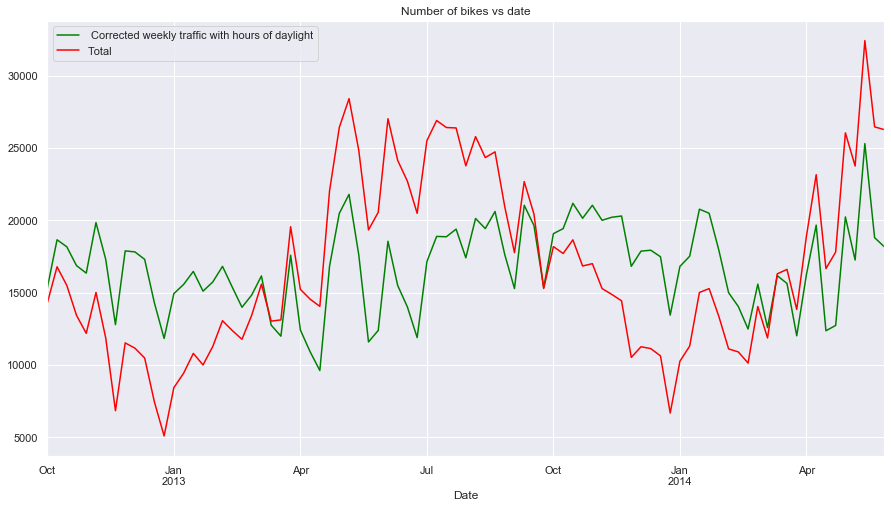

In [ ]:
#  Corrected_Weekly_Traffic

df['Corrected_Weekly_Traffic']=df["Total"]-y_pred_hours_of_light+y_pred_hours_of_light.mean()
print(df.head(10))

df['Corrected_Weekly_Traffic'].plot(figsize=(15,8), title ='Number of bikes', color='green',label =' Corrected weekly traffic with hours of daylight')
df['Total'].plot(title ='Number of bikes vs date', color='red')
plt.legend()

#Standart Deviation
standart_deviation1 = np.std(df['Corrected_Weekly_Traffic'])
print("Standart deviation with hours of daylight =" ,standart_deviation1)

In [ ]:
#  Part 2 with the day of the week

df2 = pd.read_csv (r"C:\Users\FITE CONSTANTIN\Desktop\DataEngineering\python\mde\data\Bicycle_Counter.csv" ,parse_dates=True, index_col ='Date')
df2=df2['2012-10-01':'2014-06-01']
df2=df2.resample('d').sum()
liste=[]

s =  pd.date_range('2012-10-01','2014-06-01',freq='D').to_series()
df2["day_of_week"]=s.dt.dayofweek
df2['hours_daylight']=df2.index.map(hours_of_daylight)



[Text(0, 0.5, 'Number of bikes')]

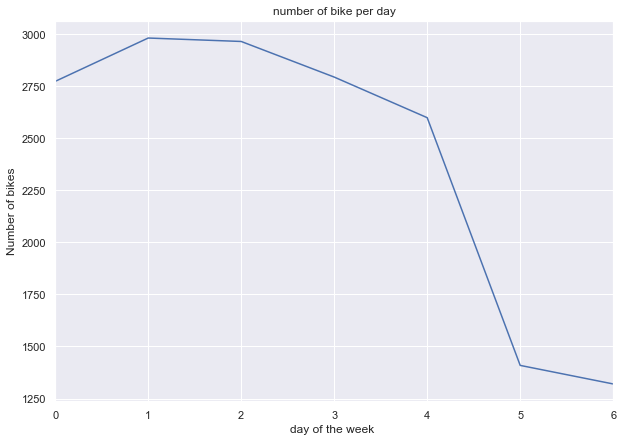

In [ ]:
#print(df2.head(10))

grouped=df2.groupby("day_of_week") # we regroup all the data by the day of the week
    
moyenne=grouped["Total"].mean() # we calcul the mean of each day

#print(moyenne)

ax= moyenne.plot(figsize=(10,7), title ='number of bike per day')
ax.set(xlabel='day of the week ')
ax.set(ylabel='Number of bikes')


Coefficients: 
 [-283.57512962  298.6534043 ]


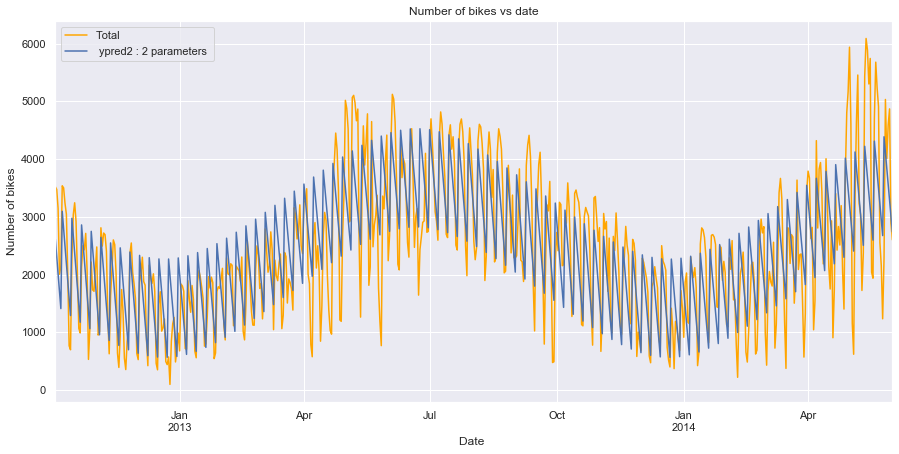

In [ ]:
regressor = LinearRegression() 

X = df2[['day_of_week','hours_daylight']]
Y= df2["Total"]

fitlinear = regressor.fit(X, Y)

print('Coefficients: \n', regressor.coef_)

X_test = df2[['day_of_week','hours_daylight']]
y_pred_hours_day = regressor.predict(X_test)

df2["ypred"] =y_pred_hours_day
ax = df2["Total"].plot( title ='Number of bikes vs date',color='orange')
ax = df2["ypred"].plot(figsize=(15,7), label =' ypred2 : 2 parameters ')

ax.set(xlabel='Date ')
ax.set(ylabel='Number of bikes')
plt.legend()

Standart deviation with day of week and hours of daylight = 759.3781213597887


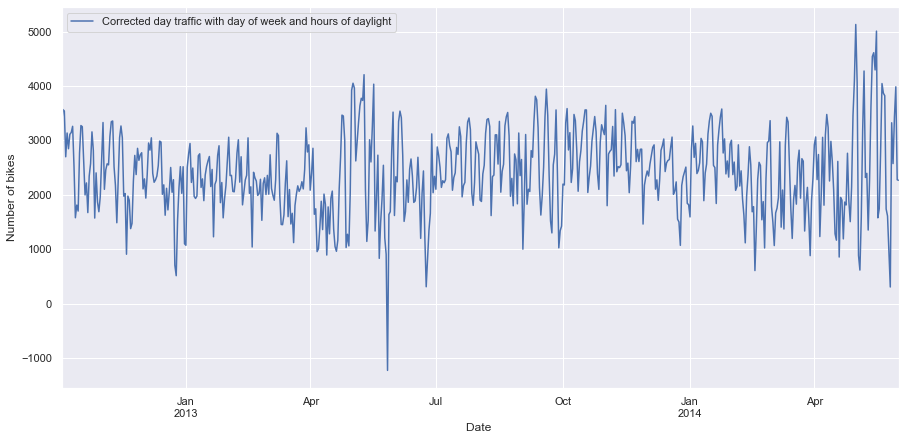

In [ ]:
df2["CDWT"]=df2["Total"]-df2["ypred"]+df2["ypred"].mean()
#print(df2)
ax = df2["CDWT"].plot(figsize=(15,7),label ="Corrected day traffic with day of week and hours of daylight")
ax.set(xlabel='Date ')
ax.set(ylabel='Number of bikes')
plt.legend()

standart_deviation2 = np.std(df2["CDWT"])
print("Standart deviation with day of week and hours of daylight =", standart_deviation2)

[Text(0, 0.5, 'Precipitation')]

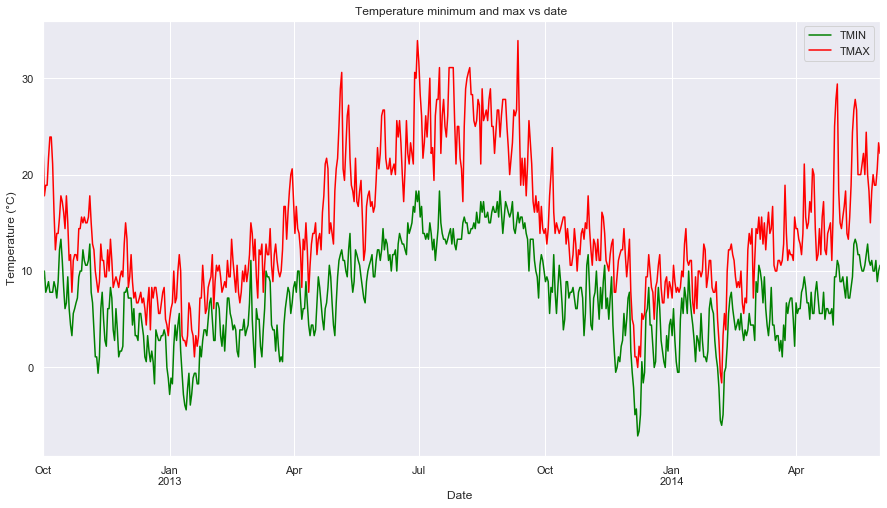

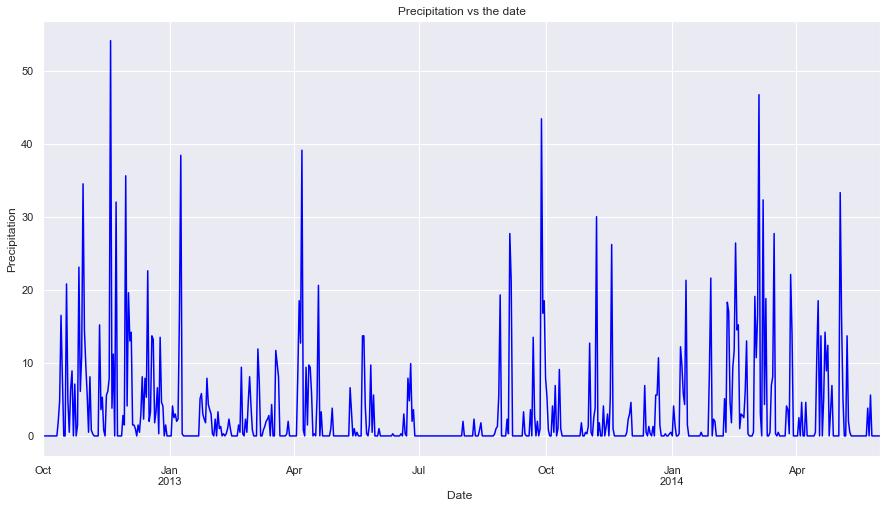

In [ ]:
#  Part 3 with the precipitation and temperature

df_prcp = pd.read_csv(r"C:\Users\FITE CONSTANTIN\Desktop\DataEngineering\python\mde\data\SeaTac.csv", usecols=["DATE","TMIN", "TMAX", "PRCP"], index_col ="DATE",  parse_dates=True)
df_prcp = df_prcp['2012-10-01':'2014-06-01']
#print(df_prcp)

df_prcp = df_prcp.dropna()
df2["Tmin"]=df_prcp['TMIN']
df2["Tmax"]=df_prcp['TMAX']
df2["Tmean"]= (df2["Tmax"]+df2["Tmin"])/2
df2["Precipitation"]=df_prcp['PRCP']


plt.figure(0)
ax1= df_prcp['TMIN'].plot(figsize=(15,8), title ='Temperature minimum and max vs date', color='green')
ax1= df_prcp['TMAX'].plot(figsize=(15,8), color='red')
plt.legend()
plt.figure(1)
ax2= df_prcp['PRCP'].plot(figsize=(15,8),title ='Precipitation vs the date', color='blue')
ax1.set(xlabel='Date ')
ax1.set(ylabel='Temperature (°C)')
ax2.set(xlabel='Date ')
ax2.set(ylabel='Precipitation')


Coefficients: 
 [-267.16316655  137.03988425  108.77411374  -62.3731642   -35.26442978]


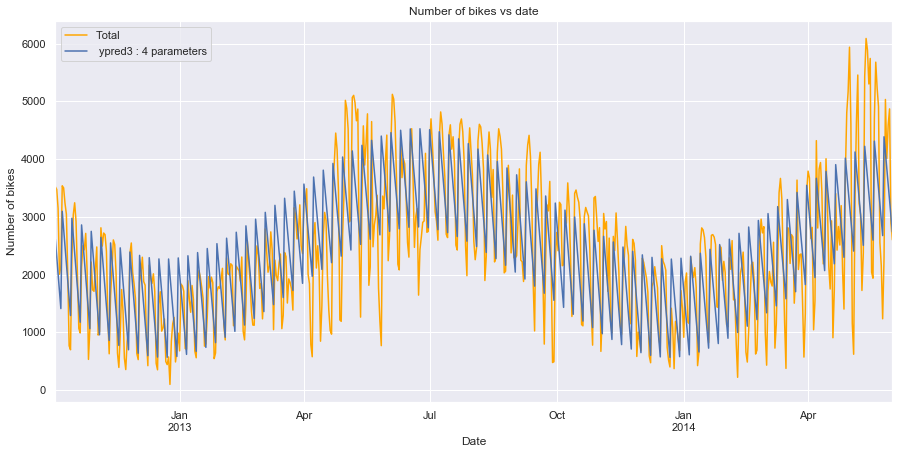

In [ ]:
regressor = LinearRegression() 

X = df2[['day_of_week','hours_daylight',"Tmax","Tmin",'Precipitation']]
Y= df2["Total"]

fitlinear_temp_prcp = regressor.fit(X, Y)

print('Coefficients: \n', regressor.coef_)

X_test = df2[['day_of_week','hours_daylight',"Tmax","Tmin",'Precipitation']]
y_pred_temp_prcp = regressor.predict(X_test)

df2["ypred_temp_prcp"] = y_pred_temp_prcp
ax = df2["Total"].plot(title ='Number of bikes vs date',color="orange")
ax = df2["ypred"].plot(figsize=(15,7),label = ' ypred3 : 4 parameters',)
ax.set(xlabel='Date')
ax.set(ylabel='Number of bikes')
plt.legend()

Standart deviation with day of week, hours of daylight, precipitation and temperature = 607.5372779510624


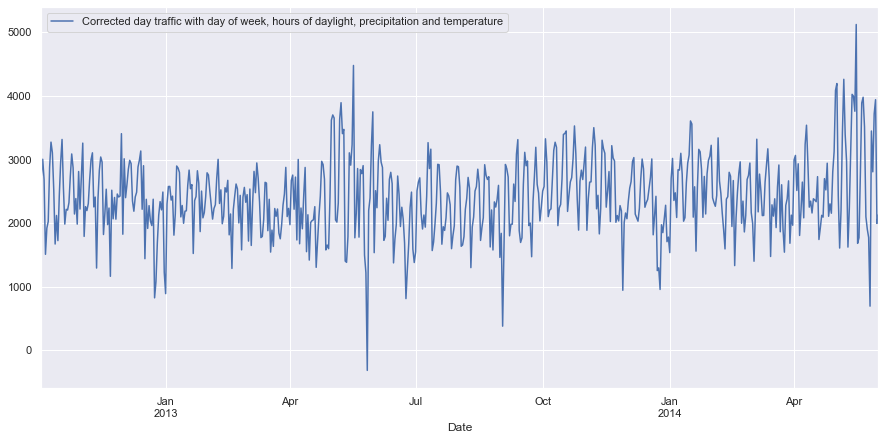

In [ ]:
df2["CDWT_temp_prcp"]=df2["Total"]-df2["ypred_temp_prcp"]+df2["ypred_temp_prcp"].mean()
#print(df2)
df2["CDWT_temp_prcp"].plot(figsize=(15,7),label= "Corrected day traffic with day of week, hours of daylight, precipitation and temperature")
ax.set(xlabel='Date ')
ax.set(ylabel='Number of bikes')
plt.legend()

standart_deviation3 = np.std(df2["CDWT_temp_prcp"])
print("Standart deviation with day of week, hours of daylight, precipitation and temperature =",standart_deviation3)